In [4]:
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

In [5]:
X,y = make_blobs(n_samples= 400, n_features=2, centers= 5,cluster_std= 1.75, shuffle=False, random_state=5622)

In [6]:
k = 3

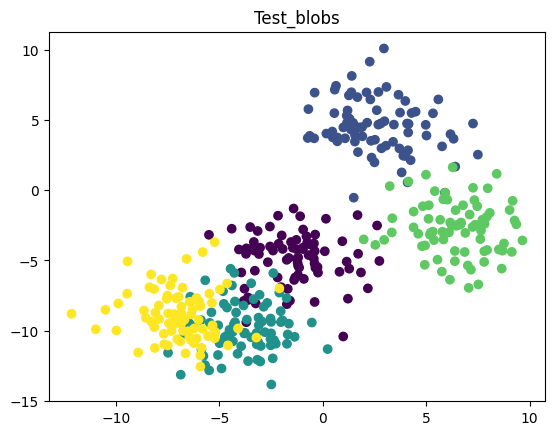

In [40]:
plt.title("Test_blobs")
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [8]:
def initialize_centroids(X):
    indexs = np.random.choice( X.shape[0], k, replace= False) #False was added to prevent choosing the same index
    centroids = np.zeros(( k, X.shape[1]))
    # print(indexs)
    # print(centroids)
    for i in range(len(indexs)):
        centroids[i]= X[indexs[i]]
    
    return centroids

In [50]:
centroids = initialize_centroids(X)
ty = np.array([0,1,2])

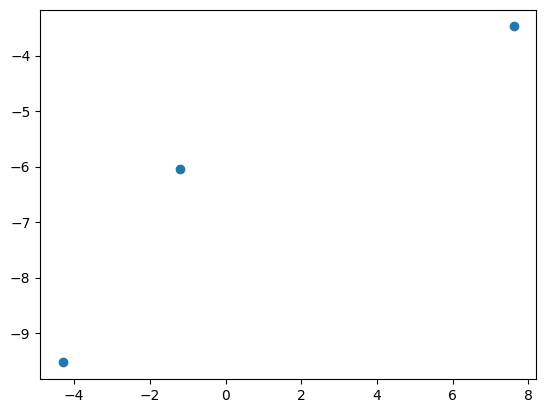

In [51]:
plt.scatter(centroids[:,0],centroids[:,1])

In [31]:
def compute_distances(X):
    distances_matrix = np.zeros((X.shape[0], k))

    for j in range(distances_matrix.shape[1]):
        # print(j)
        for i in range(X.shape[0]):
            dist = np.linalg.norm(centroids[j]-X[i])
            distances_matrix[i][j] = dist
    return distances_matrix
            

In [52]:

distances_to_centroids= compute_distances(X)

In [14]:
def compute_assignments(distances_to_centroids):
        assignments = np.zeros((distances_to_centroids.shape[0],))

        for i in range(distances_to_centroids.shape[0]): #recurrsive 
            assignments[i] = np.argmin(distances_to_centroids[i]) # better using numpy
        
        return assignments

In [53]:
assignments = compute_assignments(distances_to_centroids)
assignments

array([2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 2., 0., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 0., 0., 2., 0., 0., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2.,
       1., 1., 2., 1., 1.

In [33]:
def compute_centroids(X, assignments):
        for i in range(k):
            cluster_p = X[assignments == i] #create np arrat from Matrix X iteratring when vector assignments is true
            centroids[i] = np.mean(cluster_p, axis= 0) #find the mean of row (axis = 1)
        #END
        return centroids

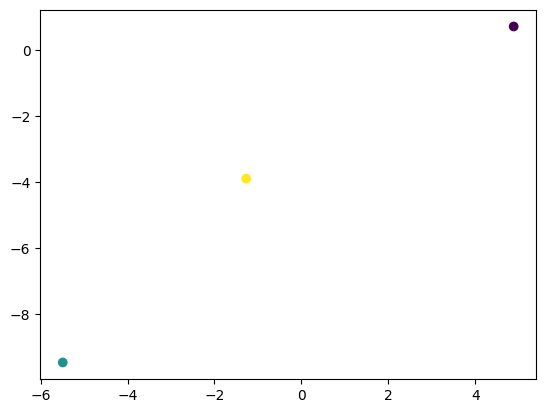

In [54]:
centroids = compute_centroids(X,assignments)
ty = np.array([0,1,2])
plt.scatter(centroids[:,0],centroids[:,1],c=ty)

In [60]:
def compute_objective(X, assignments):
    return np.sum(np.linalg.norm(X - centroids[assignments], axis=1) ** 2)


In [63]:
make_blobs?


Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or array-like of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers 